# Handwriting Recognition using K-Means

The U.S. Postal Service has been using machine learning and scanning technologies since 1999. Because its postal offices have to look at roughly half a billion pieces of mail every day, they have done extensive research and developed very efficient algorithms for reading and understanding addresses. And not only the post office:

ATMs can recognize handwritten bank checks

Evernote can recognize handwritten task lists

Expensify can recognize handwritten receipts

In this project, we will be using K-means clustering (the algorithm behind this magic) and scikit-learn to cluster images of handwritten digits.

In [23]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Investigating Dataset

In [9]:
digits = datasets.load_digits() 
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [11]:
print(digits.data)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


4
8


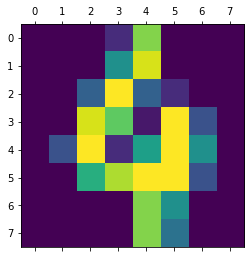

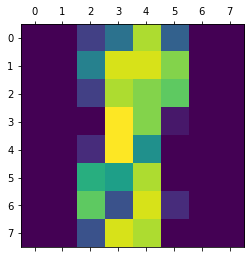

In [17]:
#  visualize the data images
plt.matshow(digits.images[100])
print(digits.target[100])

plt.matshow(digits.images[122])
print(digits.target[122])

 # Making Our Model

In [40]:
model = KMeans(n_clusters = 10,random_state =10)
model.fit(digits.data)

KMeans(n_clusters=10, random_state=10)

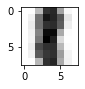

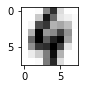

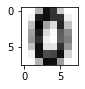

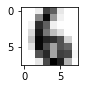

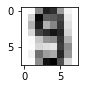

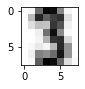

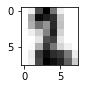

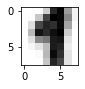

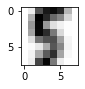

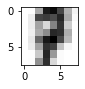

In [41]:
for i in range(10):
  fig = plt.figure()  
  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)
 
  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

These are the centroids of handwriting from thirty different people collected by Bogazici University (Istanbul, Turkey):

Index 0 looks like 8

Index 1 looks like 4

Index 2 looks like 0

Index 3 looks like 6

Index 4 looks like 9

Index 5 looks like 3

Index 6 looks like 2

Index 7 looks like 1

Index 8 looks like 5

Index 9 looks like 7

# Testing Your Model



In [36]:
#  let’s map out each of the labels with the digits we think it represents:
new_labels = [8, 9, 6, 4]
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(8)
  elif new_labels[i] == 1:
    print(4)
  elif new_labels[i] == 2:
    print(0)
  elif new_labels[i] == 3:
    print(6)
  elif new_labels[i] == 4:
    print(9)
  elif new_labels[i] == 5:
    print(3)
  elif new_labels[i] == 6:
    print(2)
  elif new_labels[i] == 7:
    print(1)
  elif new_labels[i] == 8:
    print(5)
  elif new_labels[i] == 9:
    print(7)

5
7
2
9


# We have some new sample for 1,9,5,1 =  [
[0.00,0.00,0.08,0.93,0.00,0.00,0.00,0.00,0.00,0.00,1.60,6.66,0.00,0.00,0.00,0.00,0.00,0.00,1.68,6.74,0.00,0.00,0.00,0.00,0.00,0.00,2.61,6.65,6.91,0.92,0.00,0.00,0.00,0.00,4.72,7.67,8.42,4.04,0.00,0.00,0.00,0.00,2.61,3.53,3.70,6.40,0.00,0.00,0.00,0.00,0.00,0.00,2.61,6.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,3.96,3.11,0.00,0.00,0.00,0.00,0.00,0.08,6.82,3.12,0.00,0.00,0.00,0.00,0.00,1.68,7.59,0.16,0.00,0.00,0.00,0.00,0.00,5.39,3.88,0.84,4.80,0.00,0.00,0.00,1.26,8.26,2.27,2.19,8.34,0.75,0.00,0.00,1.34,5.90,6.66,6.74,8.09,1.68,0.00,0.00,0.00,0.00,0.00,0.00,6.83,2.53,0.00,0.00,0.00,0.00,0.00,0.00,2.61,0.58,0.00],
[0.00,1.35,4.12,0.00,0.00,0.00,0.00,0.00,0.00,0.50,8.26,0.17,0.00,0.00,0.00,0.00,0.00,0.00,7.59,0.84,0.00,0.00,0.00,0.00,0.00,0.00,7.59,0.84,2.94,5.14,0.00,0.00,0.00,0.00,7.58,8.43,8.42,7.50,0.00,0.00,0.00,0.00,1.68,0.50,0.84,7.75,0.00,0.00,0.00,0.00,0.00,0.00,0.67,8.35,0.34,0.00,0.00,0.00,0.00,0.00,0.00,1.17,0.00,0.00],
[0.00,1.35,4.63,0.00,0.00,0.00,0.00,0.00,0.00,0.42,7.84,0.75,0.00,0.34,0.00,0.00,0.00,0.00,7.58,0.84,0.00,6.31,3.62,0.00,0.00,0.00,7.75,3.88,3.37,5.97,7.67,0.58,0.00,0.00,4.63,5.05,5.05,5.05,7.84,2.10,0.00,0.00,0.00,0.00,0.00,0.00,5.56,2.94,0.00,0.00,0.00,0.00,0.00,0.00,4.47,3.96,0.00,0.00,0.00,0.00,0.00,0.00,4.55,4.21]
]

and 7,1,0,0 = [
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.71,0.92,0.00,0.00,0.00,0.00,0.00,0.00,4.54,6.06,0.00,0.00,0.00,0.00,0.00,0.00,0.42,7.92,0.92,0.00,0.00,0.00,0.00,0.00,0.00,6.49,2.19,0.00,0.00,0.00,0.00,0.00,0.00,5.90,2.53,0.00,0.00,0.00,0.00,0.00,0.00,3.12,1.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,5.39,4.80,2.95,0.25,0.00,0.00,0.00,0.34,4.97,3.71,6.07,7.84,2.85,0.00,0.00,0.00,0.00,0.00,0.00,3.52,6.32,0.00,0.00,0.00,0.00,0.00,0.00,6.98,7.59,0.93,0.00,0.00,0.00,0.00,0.00,4.46,1.93,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.84,0.17,0.00,0.00,0.00,2.10,6.24,7.84,7.59,8.10,6.66,3.79,0.33,3.12,2.69,0.92,0.00,0.17,1.94,6.41,3.87,0.00,0.00,0.00,0.00,0.00,0.58,6.90,3.28,0.00,0.00,0.00,0.00,0.00,5.21,6.82,0.08,0.00,0.00,2.19,0.42,2.78,7.59,2.77,0.00,0.00,0.00,5.21,8.09,7.08,2.10,0.00,0.00,0.00,0.00,0.08,0.84,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,2.11,1.26,0.00,0.00,0.00,0.00,0.00,0.08,6.56,3.03,0.00,0.00,0.00,0.00,0.00,2.77,7.24,0.25,5.89,0.17,0.00,0.00,0.00,2.01,7.25,7.50,8.43,1.26,0.00,0.00,0.00,0.00,0.00,1.09,6.49,2.27,0.00,0.00,0.00,0.00,0.00,0.00,4.55,4.21,0.00,0.00,0.00,0.00,0.00,0.00,2.86,5.56,0.00,0.00,0.00,0.00,0.00,0.00,1.26,7.75,0.00]
]

In [57]:
new_sample_1 = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.11,1.09,0.00,0.00,0.00,0.00,0.00,0.00,7.08,1.77,0.00,0.00,0.00,0.00,0.00,3.19,7.92,3.37,5.39,0.00,0.00,0.00,0.00,1.68,4.55,6.99,7.16,0.00,0.00,0.00,0.00,0.00,0.00,1.68,6.74,0.00,0.00,0.00,0.00,0.00,0.00,1.51,7.75,0.00,0.00],
[0.00,0.00,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.50,0.76,0.00,0.84,0.16,0.00,0.00,0.00,6.58,1.94,0.08,7.00,2.44,0.00,0.00,0.00,4.89,4.71,5.29,8.00,0.58,0.00,0.00,0.00,2.10,6.57,5.89,7.59,0.00,0.00,0.00,0.00,0.00,0.00,0.84,7.67,0.00,0.00,0.00,0.00,0.00,0.00,0.25,5.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.63,2.28,0.00,0.00,0.00,0.00,0.00,0.00,4.47,4.13,0.00,0.00,0.00,0.00,0.00,0.00,2.86,5.56,0.00,0.00,0.00,0.00,0.00,0.00,2.10,6.40,0.00,0.00,0.00,0.00,0.00,0.00,1.68,6.74,0.00,0.00,0.00,0.00,0.00,0.00,1.68,7.93,2.53,0.00,0.00,0.00,0.00,0.00,0.17,2.44,0.84,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.27,6.75,6.15,4.22,1.85,0.00,0.00,0.84,4.63,7.67,8.01,6.74,7.25,0.00,0.00,2.95,5.73,3.62,6.24,4.05,0.17,0.00,0.00,0.00,0.00,0.84,7.76,1.26,0.00,0.00,0.00,0.00,0.25,6.24,4.22,0.00,0.00,0.00,0.00,0.08,5.90,7.49,5.47,1.35,0.00,0.00,0.00,5.47,8.44,7.00,4.21,0.42,0.00]
])
new_sample_2 = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.71,0.92,0.00,0.00,0.00,0.00,0.00,0.00,4.54,6.06,0.00,0.00,0.00,0.00,0.00,0.00,0.42,7.92,0.92,0.00,0.00,0.00,0.00,0.00,0.00,6.49,2.19,0.00,0.00,0.00,0.00,0.00,0.00,5.90,2.53,0.00,0.00,0.00,0.00,0.00,0.00,3.12,1.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,5.39,4.80,2.95,0.25,0.00,0.00,0.00,0.34,4.97,3.71,6.07,7.84,2.85,0.00,0.00,0.00,0.00,0.00,0.00,3.52,6.32,0.00,0.00,0.00,0.00,0.00,0.00,6.98,7.59,0.93,0.00,0.00,0.00,0.00,0.00,4.46,1.93,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.84,0.17,0.00,0.00,0.00,2.10,6.24,7.84,7.59,8.10,6.66,3.79,0.33,3.12,2.69,0.92,0.00,0.17,1.94,6.41,3.87,0.00,0.00,0.00,0.00,0.00,0.58,6.90,3.28,0.00,0.00,0.00,0.00,0.00,5.21,6.82,0.08,0.00,0.00,2.19,0.42,2.78,7.59,2.77,0.00,0.00,0.00,5.21,8.09,7.08,2.10,0.00,0.00,0.00,0.00,0.08,0.84,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,2.11,1.26,0.00,0.00,0.00,0.00,0.00,0.08,6.56,3.03,0.00,0.00,0.00,0.00,0.00,2.77,7.24,0.25,5.89,0.17,0.00,0.00,0.00,2.01,7.25,7.50,8.43,1.26,0.00,0.00,0.00,0.00,0.00,1.09,6.49,2.27,0.00,0.00,0.00,0.00,0.00,0.00,4.55,4.21,0.00,0.00,0.00,0.00,0.00,0.00,2.86,5.56,0.00,0.00,0.00,0.00,0.00,0.00,1.26,7.75,0.00]
])
new_label_1 = model.predict(new_sample_1)
new_label_2 = model.predict(new_sample_2)
def map_label(label):
    for i in range(len(label)):
      if label[i] == 0:
        print(8)
      elif label[i] == 1:
        print(4)
      elif label[i] == 2:
        print(0)
      elif label[i] == 3:
        print(6)
      elif label[i] == 4:
        print(9)
      elif label[i] == 5:
        print(3)
      elif label[i] == 6:
        print(2)
      elif label[i] == 7:
        print(1)
      elif label[i] == 8:
        print(5)
      elif label[i] == 9:
        print(7)
map_label(new_label_1) 
print('----')
map_label(new_label_2)        

1
9
5
1
----
7
1
0
9


Remember, this model is trained on handwritten digits of 30 Turkish people (from the 1990’s).
So, its accuracy is not 100% but it still recognizing our handwriting.